In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Stock Market Prediction\NSE-Tata-Global-Beverages-Limited.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [3]:
x=df[['Open']]
y=df[['Close']]

In [4]:
x.shape

(1235, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

In [6]:
x_scale=MinMaxScaler()
y_scale=MinMaxScaler()

In [7]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
x_train.shape

(988, 1)

In [8]:
x_train = x_scale.fit_transform(np.array(x_train).reshape(-1,1))
x_test = x_scale.transform(np.array(x_test).reshape(-1,1))
y_train = y_scale.fit_transform(np.array(y_train).reshape(-1,1))
y_test = y_scale.transform(np.array(y_test).reshape(-1,1))
x_train.shape



(988, 1)

In [9]:
!pip install tensorflow

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,LSTM,Dense,Flatten
from tensorflow.keras.layers import Dropout

In [11]:

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Separate Input layer
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))


In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.fit(x_train,y_train,epochs=10)
model.evaluate(x_test,y_test)
op = model.predict(x_scale.transform(np.array([208]).reshape(-1,1)))
y_scale.inverse_transform(op.reshape(-1, 1))


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7.9405e-04 - mse: 7.9405e-04
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.2329e-04 - mse: 4.2329e-04
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0246e-04 - mse: 4.0246e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.4825e-04 - mse: 4.4825e-04
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3316e-04 - mse: 4.3316e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8339e-04 - mse: 4.8339e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6740e-04 - mse: 4.6740e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8833e-04 - mse: 4.8833e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4596e-04 - mse: 3.4596e-04
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8845e-04 - mse: 3.8845e-04
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3477e-04 - mse: 3.3477e-04  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


array([[208.21124]], dtype=float32)

In [44]:
loss, mse = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test MSE: {mse}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3477e-04 - mse: 3.3477e-04 
Test Loss: 0.0002738336625043303, Test MSE: 0.0002738336625043303


In [46]:
y_new=model.predict(x_test)
y_new,y_test

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


(array([[[0.09588502]],
 
        [[0.0712249 ]],
 
        [[0.1443271 ]],
 
        [[0.8105047 ]],
 
        [[0.91866416]],
 
        [[0.11943027]],
 
        [[0.2529532 ]],
 
        [[0.28304458]],
 
        [[0.17618583]],
 
        [[0.31336713]],
 
        [[0.24442104]],
 
        [[0.40549383]],
 
        [[0.1178604 ]],
 
        [[0.16833246]],
 
        [[0.13378446]],
 
        [[0.14118664]],
 
        [[0.08063979]],
 
        [[0.90000314]],
 
        [[0.23499145]],
 
        [[0.20715608]],
 
        [[0.21680796]],
 
        [[0.21927711]],
 
        [[0.20356488]],
 
        [[0.7790183 ]],
 
        [[0.8543572 ]],
 
        [[0.1752883 ]],
 
        [[0.65621215]],
 
        [[0.23993069]],
 
        [[0.22354226]],
 
        [[0.07974312]],
 
        [[0.06898339]],
 
        [[0.06225921]],
 
        [[0.19570956]],
 
        [[0.18673272]],
 
        [[0.06786266]],
 
        [[0.68005383]],
 
        [[0.24801342]],
 
        [[0.7970107 ]],
 
        [[0.

In [48]:
import numpy as np

rmse = np.sqrt(mse)
print(f"Test RMSE: {rmse}")


Test RMSE: 0.01654792018666788


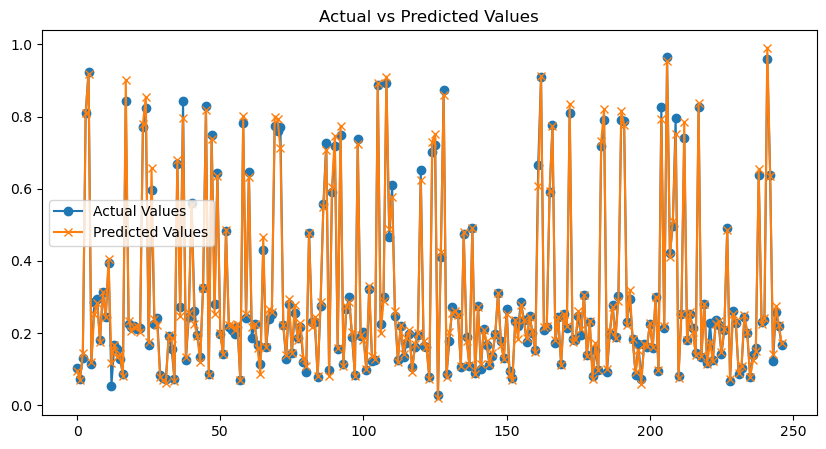

In [50]:
import matplotlib.pyplot as plt
y_new = y_new.reshape(-1)  # Converts shape (247, 1, 1) -> (247,)

plt.figure(figsize=(10, 5))
plt.plot(y_test, label="Actual Values", marker="o")
plt.plot(y_new, label="Predicted Values", marker="x")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_new)
print(f"R² Score: {r2}")


R² Score: 0.9951473838670286


Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0548e-04 - mse: 4.0548e-04 - val_loss: 2.8408e-04 - val_mse: 2.8408e-04
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4826e-04 - mse: 3.4826e-04 - val_loss: 2.8040e-04 - val_mse: 2.8040e-04
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.0967e-04 - mse: 4.0967e-04 - val_loss: 4.4166e-04 - val_mse: 4.4166e-04
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2595e-04 - mse: 4.2595e-04 - val_loss: 2.7443e-04 - val_mse: 2.7443e-04
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0148e-04 - mse: 4.0148e-04 - val_loss: 2.7044e-04 - val_mse: 2.7044e-04
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3037e-04 - mse: 4.3037e-04 - val_loss: 5.7895e-04 - val_mse: 5.7895e-04
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4417e-04 - mse: 5.4417e-04 - val_loss: 3.1273e-04 - val_mse: 3.1273e-04
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4163e-04 - mse: 

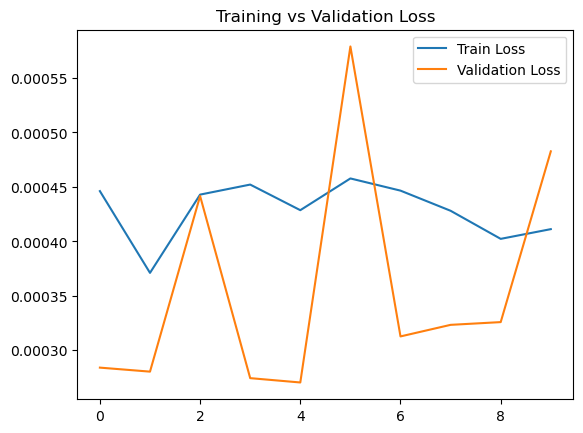

In [54]:
import matplotlib.pyplot as plt
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
